In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)

In [160]:
#Import the datasets from https://www.england.nhs.uk/statistics/statistical-work-areas/diagnostics-waiting-times-and-activity/diagnostics-census-data/
#I have combined the quarterly data into yearly csv files. 

#Each dataframe contains, for each quarter, the number of patients in the NHS which waited between 6 & 13 weeks and 
#the patients which waited over 13 weeks to recieve diagnostic treatment via consultant for different area's of medicine.
wait_time_2017_18=pd.read_csv("2017-18.csv")
wait_time_2016_17=pd.read_csv("2016-17.csv")
wait_time_2015_16=pd.read_csv("2015-16.csv")
wait_time_2014_15=pd.read_csv("2014-15.csv")
wait_time_2013_14=pd.read_csv("2013-14.csv")
wait_time_2012_13=pd.read_csv("2012-13.csv")
wait_time_2011_12=pd.read_csv("2011-12.csv")
wait_time_2010_11=pd.read_csv("2010-11.csv")
wait_time_2009_10=pd.read_csv("2009-10.csv")
wait_time_2008_09=pd.read_csv("2008-09.csv")

#List containing each dataframe.
wait_time_list=[wait_time_2017_18,wait_time_2016_17,wait_time_2015_16,wait_time_2014_15,wait_time_2013_14,wait_time_2012_13,wait_time_2011_12,wait_time_2010_11,wait_time_2009_10,wait_time_2008_09]

#Removing the empty row at the bottom of some dataframes.
for i in range(0,len(wait_time_list)):
    if wait_time_list[i].shape[0]>13:
        wait_time_list[i]=wait_time_list[i].drop(13)
               
    else:
        continue
#Check to see if all dataframes have the correct number of rows
for item in wait_time_list:
    if item.shape[0] != 13:
        print("Error, the table has too many columns")
    else:
        continue

#Rename columns of each dataframe, drop the repeated columns.
for i in range(0,len(wait_time_list)):
    if len(wait_time_list[i].columns)==12:
        wait_time_list[i].columns=["Department","06 < 13 Weeks, Q1","13+ Weeks, Q1","Area","06 < 13 Weeks, Q2","13+ Weeks, Q2","Area","06 < 13 Weeks, Q3","13+ Weeks, Q3","Area","06 < 13 Weeks, Q4","13+ Weeks, Q4"]
    if "Area" in wait_time_list[i].columns.values:
        wait_time_list[i]=wait_time_list[i].drop("Area", axis=1)
    if "Area" in list(wait_time_list[i].iloc[0]):
        wait_time_list[i]=wait_time_list[i].drop(0,axis=0)
        

#Remove the commas from the values within the dataframe and then convert them to floats.
        
for i in range(0,len(wait_time_list)):
    
    wait_time_list[i].iloc[:,wait_time_list[i].columns != "Department"]=wait_time_list[i].iloc[:,wait_time_list[i].columns != "Department"].apply(lambda x: x.str.replace(",","").astype(float))        
    wait_time_list[i][["06 < 13 Weeks, Q1","13+ Weeks, Q1","06 < 13 Weeks, Q2","13+ Weeks, Q2","06 < 13 Weeks, Q3","13+ Weeks, Q3","06 < 13 Weeks, Q4","13+ Weeks, Q4"]]=wait_time_list[i][["06 < 13 Weeks, Q1","13+ Weeks, Q1","06 < 13 Weeks, Q2","13+ Weeks, Q2","06 < 13 Weeks, Q3","13+ Weeks, Q3","06 < 13 Weeks, Q4","13+ Weeks, Q4"]].astype("float64")
    
    

#Add a totals column that sums the rows. 
for i in range(0,len(wait_time_list)):
    wait_time_list[i].loc[:,"total"]=wait_time_list[i].sum(axis=1, numeric_only=True) 

#Iterate through list to attach a row to each dataframe consisting of the year and remove the row totals. We'll convert these to column totals.

for i in range(0,len(wait_time_list)):
    years=["2017","2016","2015","2014","2013","2012","2011","2010","2009","2008"]
    wait_time_list[i].insert(0, "Year",[years[i],years[i],years[i],years[i],years[i],years[i],years[i],years[i],years[i],years[i],years[i],years[i]])
    wait_time_list[i]=wait_time_list[i].drop(12)
    wait_time_list[i]["Year"]=wait_time_list[i]["Year"].astype("string")
    
#Rename the individual data frames to reflect the changes in shape and added info.
wait_time_2017_18=wait_time_list[0]
wait_time_2016_17=wait_time_list[1]
wait_time_2015_16=wait_time_list[2]
wait_time_2014_15=wait_time_list[3]
wait_time_2013_14=wait_time_list[4]
wait_time_2012_13=wait_time_list[5]
wait_time_2011_12=wait_time_list[6]
wait_time_2010_11=wait_time_list[7]
wait_time_2009_10=wait_time_list[8]
wait_time_2008_09=wait_time_list[9]



#Function that we will use to put dataframes into one big super dataframe. To do this properly, will need to turn department row into column headings.
wait_time_all=pd.concat([wait_time_2017_18,wait_time_2016_17,wait_time_2015_16,wait_time_2014_15,wait_time_2013_14,wait_time_2012_13,wait_time_2011_12,wait_time_2010_11,wait_time_2009_10,wait_time_2008_09], axis=0)
wait_time_all=wait_time_all

In [161]:
wait_time_all

,Year,Department,"06 < 13 Weeks, Q1","13+ Weeks, Q1","06 < 13 Weeks, Q2","13+ Weeks, Q2","06 < 13 Weeks, Q3","13+ Weeks, Q3","06 < 13 Weeks, Q4","13+ Weeks, Q4",total
1,2017,Audiology,832.0,128.0,1546.0,276.0,1439.0,249.0,834.0,139.0,5443.0
2,2017,Cardiology,4733.0,1296.0,4392.0,1275.0,5119.0,1197.0,4647.0,1396.0,24055.0
3,2017,Endoscopy,5224.0,1686.0,5723.0,1851.0,5670.0,1874.0,5609.0,1362.0,28999.0
4,2017,GI Physiology,487.0,365.0,336.0,499.0,353.0,492.0,538.0,560.0,3630.0
5,2017,Imaging,8097.0,1116.0,7927.0,1051.0,9796.0,1177.0,12218.0,1949.0,43331.0
...,...,...,...,...,...,...,...,...,...,...,...
7,2008,Ophthalmic Science,478.0,363.0,469.0,90.0,560.0,72.0,390.0,7.0,2429.0
8,2008,Pathology,1029.0,674.0,1304.0,623.0,726.0,532.0,875.0,297.0,6060.0
9,2008,Respiratory Physiology,473.0,68.0,268.0,59.0,201.0,40.0,312.0,63.0,1484.0
10,2008,Urodynamics,255.0,41.0,88.0,29.0,113.0,3.0,122.0,4.0,655.0


In [162]:
wait_time_all.describe(include="all")

,Year,Department,"06 < 13 Weeks, Q1","13+ Weeks, Q1","06 < 13 Weeks, Q2","13+ Weeks, Q2","06 < 13 Weeks, Q3","13+ Weeks, Q3","06 < 13 Weeks, Q4","13+ Weeks, Q4",total
count,110,110,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,109.000000,110.000000
unique,10,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017,Audiology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,11,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1292.390909,313.781818,1183.590909,309.436364,1425.709091,295.900000,1345.881818,286.082569,6450.172727
std,NaN,NaN,1814.214345,466.485796,1613.236961,455.951058,1887.812901,393.679466,1952.734398,386.227939,8359.675071
min,NaN,NaN,14.000000,2.000000,27.000000,1.000000,9.000000,0.000000,12.000000,1.000000,81.000000
25%,NaN,NaN,224.250000,37.000000,198.250000,47.500000,254.500000,41.000000,216.250000,41.000000,1168.500000
50%,NaN,NaN,475.500000,127.500000,408.500000,149.000000,538.000000,140.000000,529.500000,143.000000,2696.500000
75%,NaN,NaN,1379.250000,361.500000,1437.500000,327.750000,1989.250000,458.500000,1534.250000,354.000000,8351.250000


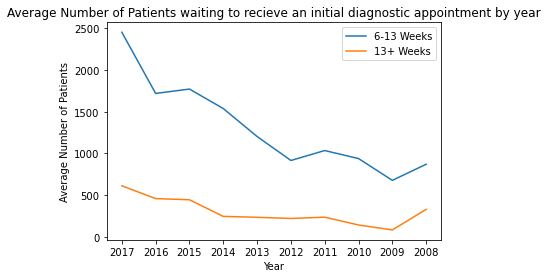

In [169]:
#Let's try and find the mean of all departments where the patient waited more than 13weeks for each year.

#List containing the years
years=["2017","2016","2015","2014","2013","2012","2011","2010","2009","2008"]

#Select relevant columns, 13+weeks and year.
all_13_weeks=wait_time_all[(["Year","13+ Weeks, Q1","13+ Weeks, Q2","13+ Weeks, Q3","13+ Weeks, Q4"])]

#Take the mean of the selected columns: average number of patients who waited more than 13 weeks each year
mean_08_13_weeks=all_13_weeks[wait_time_all.Year=="2008"].mean().mean()
mean_09_13_weeks=all_13_weeks[wait_time_all.Year=="2009"].mean().mean()
mean_10_13_weeks=all_13_weeks[wait_time_all.Year=="2010"].mean().mean()
mean_11_13_weeks=all_13_weeks[wait_time_all.Year=="2011"].mean().mean()
mean_12_13_weeks=all_13_weeks[wait_time_all.Year=="2012"].mean().mean()
mean_13_13_weeks=all_13_weeks[wait_time_all.Year=="2013"].mean().mean()
mean_14_13_weeks=all_13_weeks[wait_time_all.Year=="2014"].mean().mean()
mean_15_13_weeks=all_13_weeks[wait_time_all.Year=="2015"].mean().mean()
mean_16_13_weeks=all_13_weeks[wait_time_all.Year=="2016"].mean().mean()
mean_17_13_weeks=all_13_weeks[wait_time_all.Year=="2017"].mean().mean()

#Select relevant columns, 6-13weeks and year
all_06_weeks=wait_time_all[(["Year","06 < 13 Weeks, Q1","06 < 13 Weeks, Q2","06 < 13 Weeks, Q3","06 < 13 Weeks, Q4"])]

#Take the mean of the selected columns: average number of patients who waited between 6-13 weeks each year
mean_08_06_weeks=all_06_weeks[wait_time_all.Year=="2008"].mean().mean()
mean_09_06_weeks=all_06_weeks[wait_time_all.Year=="2009"].mean().mean()
mean_10_06_weeks=all_06_weeks[wait_time_all.Year=="2010"].mean().mean()
mean_11_06_weeks=all_06_weeks[wait_time_all.Year=="2011"].mean().mean()
mean_12_06_weeks=all_06_weeks[wait_time_all.Year=="2012"].mean().mean()
mean_13_06_weeks=all_06_weeks[wait_time_all.Year=="2013"].mean().mean()
mean_14_06_weeks=all_06_weeks[wait_time_all.Year=="2014"].mean().mean()
mean_15_06_weeks=all_06_weeks[wait_time_all.Year=="2015"].mean().mean()
mean_16_06_weeks=all_06_weeks[wait_time_all.Year=="2016"].mean().mean()
mean_17_06_weeks=all_06_weeks[wait_time_all.Year=="2017"].mean().mean()

#list compiling the means of 6-13weeks
mean_06_weeks_list_year=[mean_17_06_weeks,mean_16_06_weeks,mean_15_06_weeks,mean_14_06_weeks,mean_13_06_weeks,mean_12_06_weeks,mean_11_06_weeks,mean_10_06_weeks,mean_09_06_weeks,mean_08_06_weeks]

#list compiling the means of 13+ weeks
mean_13_weeks_list_year=[mean_17_13_weeks,mean_16_13_weeks,mean_15_13_weeks,mean_14_13_weeks,mean_13_13_weeks,mean_12_13_weeks,mean_11_13_weeks,mean_10_13_weeks,mean_09_13_weeks,mean_08_13_weeks]
#produce scatter plot x: year, y: average  number of patients waiting 13+ or 6-13 weeks for initial diagnostic appt.
plt.title("Average Number of Patients waiting to recieve an initial diagnostic appointment by year")
plt.xlabel("Year")
plt.ylabel("Average Number of Patients")
plt.plot(years,mean_06_weeks_list_year,label="6-13 Weeks")
plt.plot(years,mean_13_weeks_list_year,label="13+ Weeks")
plt.legend()

From the above plot, it can be seen that the average number of patients waiting for an initial diagnostic appointment increases each year from 2009, except from 2012. This is true for number of patients for both 6-13 weeks and 13+ weeks waiting time.

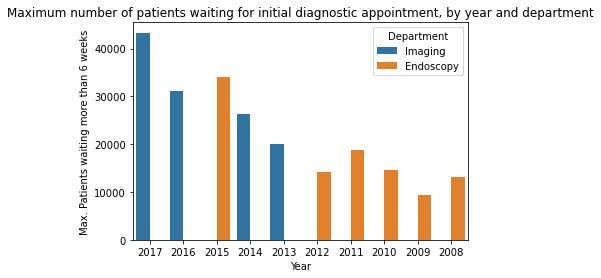

In [203]:
#Now lets find the busiest department each year.
years=["2017","2016","2015","2014","2013","2012","2011","2010","2009","2008"]
year_dep_tot=wait_time_all[["Year","Department","total"]]
dep_tot_17=year_dep_tot[year_dep_tot.Year=="2017"].query("total == total.max()")
dep_tot_16=year_dep_tot[year_dep_tot.Year=="2016"].query("total == total.max()")
dep_tot_15=year_dep_tot[year_dep_tot.Year=="2015"].query("total == total.max()")
dep_tot_14=year_dep_tot[year_dep_tot.Year=="2014"].query("total == total.max()")
dep_tot_13=year_dep_tot[year_dep_tot.Year=="2013"].query("total == total.max()")
dep_tot_12=year_dep_tot[year_dep_tot.Year=="2012"].query("total == total.max()")
dep_tot_11=year_dep_tot[year_dep_tot.Year=="2011"].query("total == total.max()")
dep_tot_10=year_dep_tot[year_dep_tot.Year=="2010"].query("total == total.max()")
dep_tot_09=year_dep_tot[year_dep_tot.Year=="2009"].query("total == total.max()")
dep_tot_08=year_dep_tot[year_dep_tot.Year=="2008"].query("total == total.max()")

dep_tot_all=pd.concat([dep_tot_17,dep_tot_16,dep_tot_15,dep_tot_14,dep_tot_13,dep_tot_12,dep_tot_11,dep_tot_10,dep_tot_09,dep_tot_08])

sns.barplot(x = dep_tot_all["Year"], y = dep_tot_all["total"], hue = "Department", data= dep_tot_all)
plt.title("Maximum number of patients waiting for initial diagnostic appointment, by year and department")
plt.ylabel("Max. Patients waiting more than 6 weeks")
plt.show()


The above bar plot shows that, in line with the average, the maximum number of patients waiting each year increases from 2009 (apart from 2012) to 2017. 

It also shows that more patients wait more than 6 weeks for Imaging and Endoscopy than any other discipline.
 